In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [16]:
Heart = pd.read_csv('Heart Disease data.csv')

In [18]:
Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
Heart['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [22]:
Heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
output=Heart.groupby('target').size()
output


target
0    499
1    526
dtype: int64

In [29]:
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [31]:
Heart['Heart_Disease']=Heart['target'].apply(heart_disease)
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [32]:
HD = Heart.groupby('Heart_Disease')['target'].count()
HD.head()

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

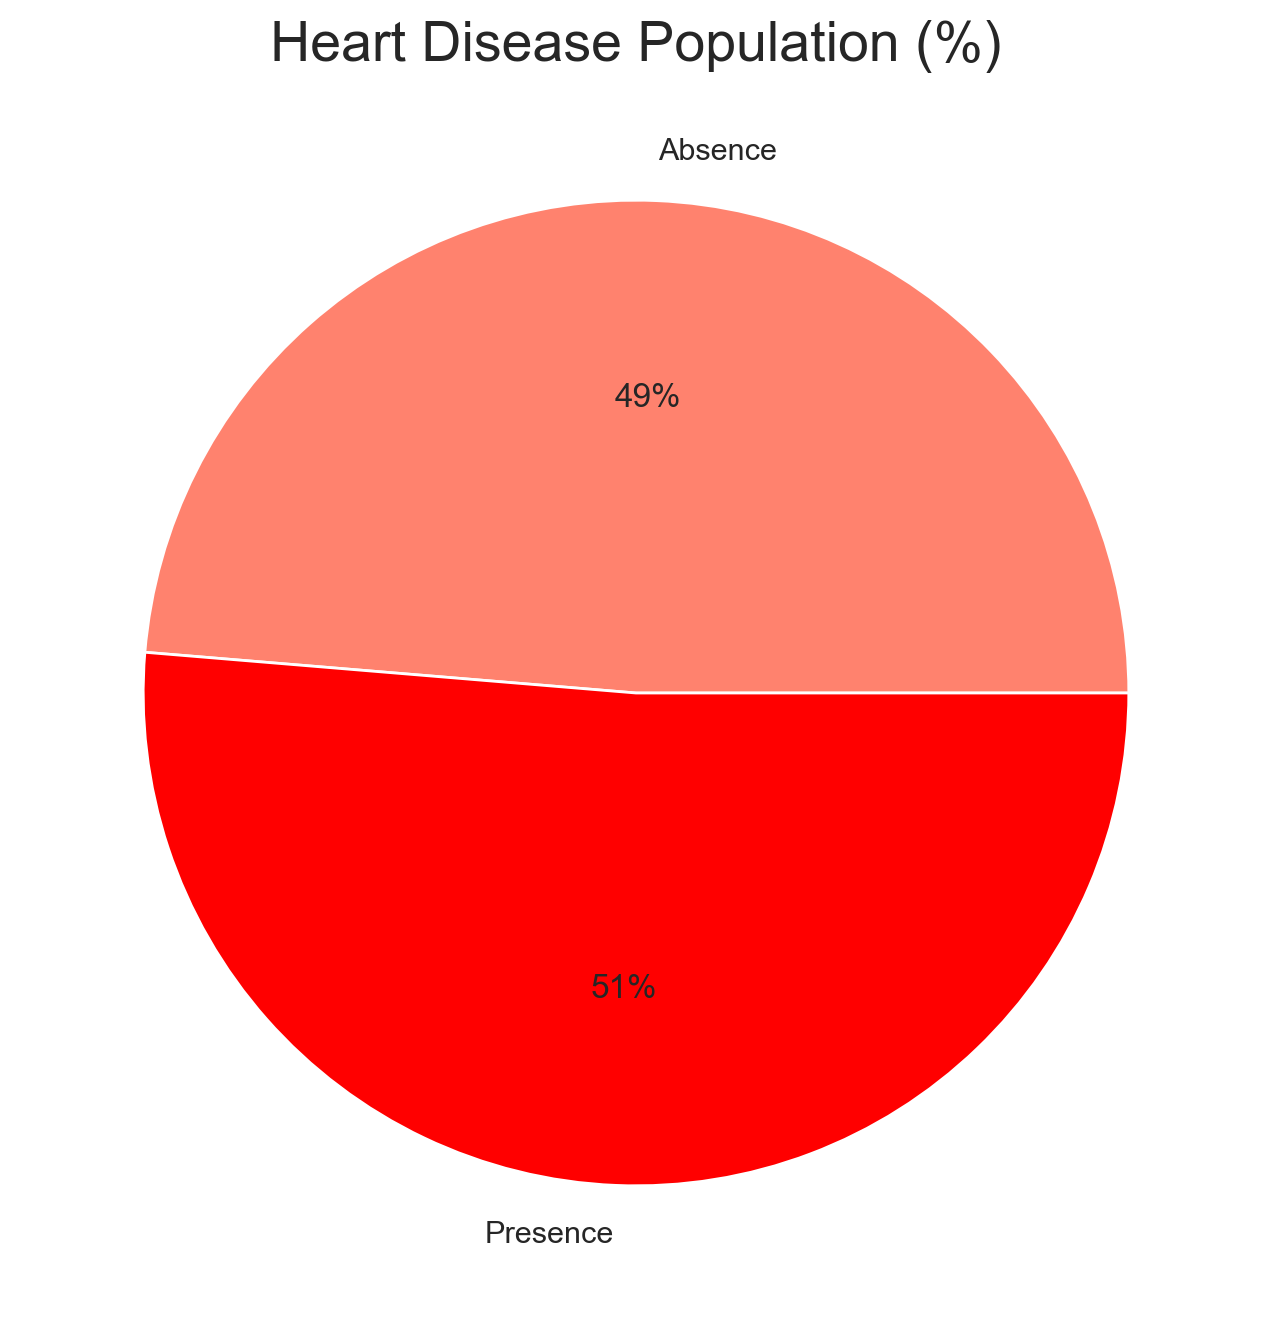

In [33]:
plt.figure(figsize=(12,8))
plt.pie(HD, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population (%)', fontsize=20)
plt.show()

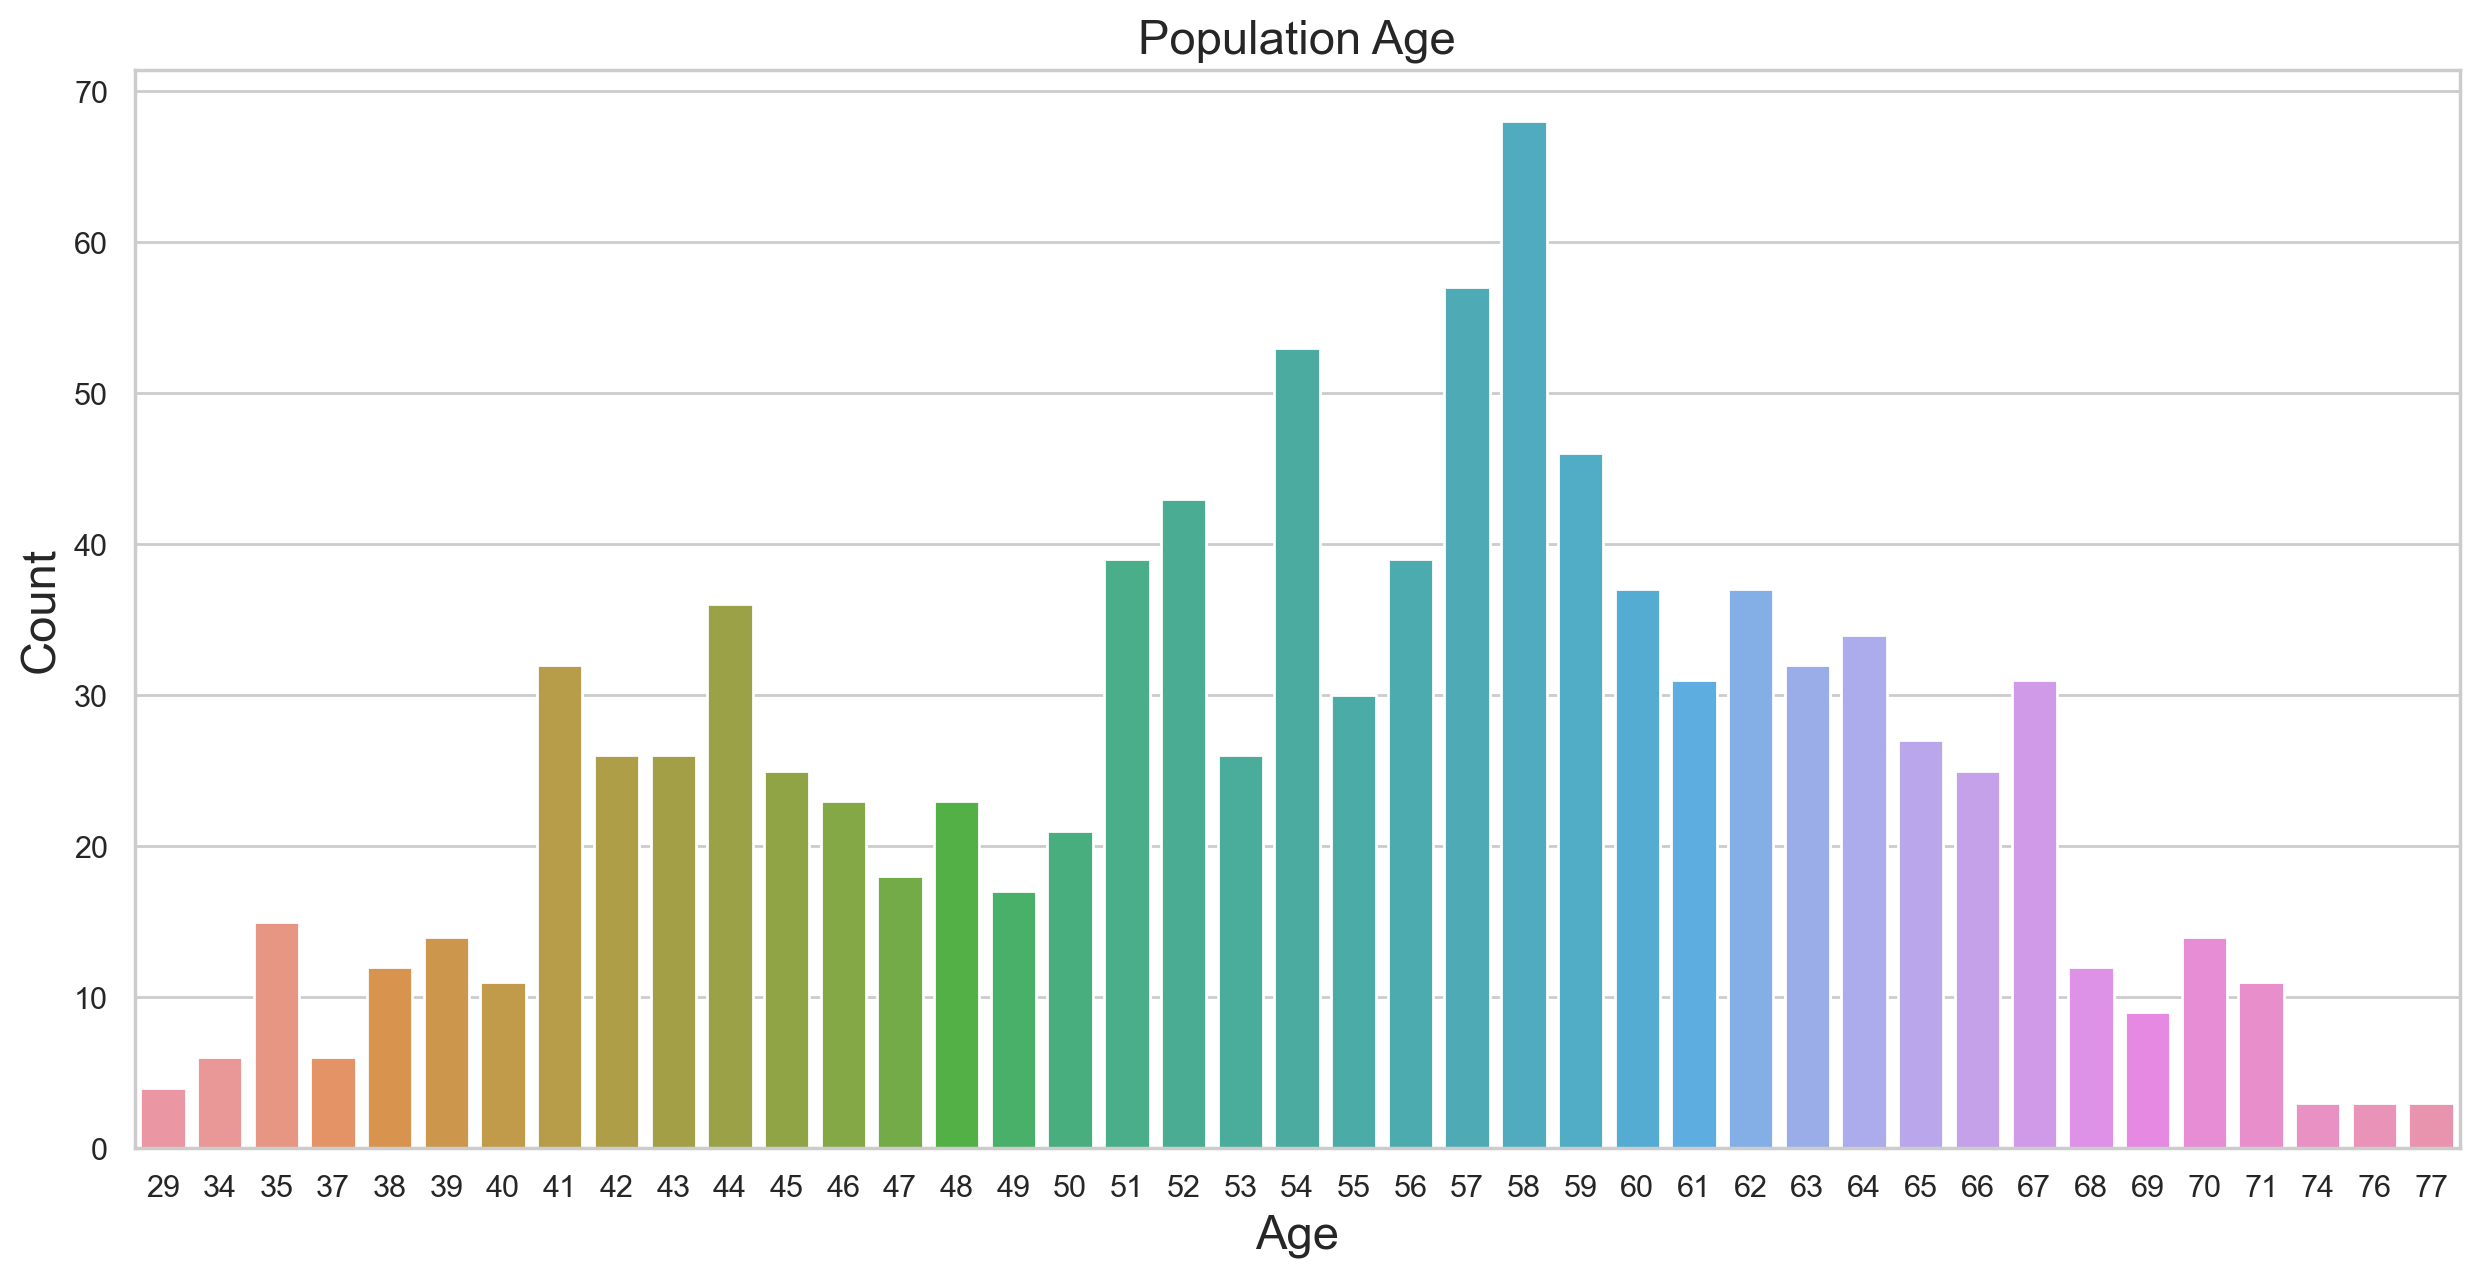

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=Heart)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

In [35]:
Min_Age=Heart['age'].min()
Max_Age=Heart['age'].max()
Mean_Age=Heart['age'].mean()
print("Minimum Age :>",Min_Age)
print("Maximum Age :>",Max_Age)
print("Mean Age :>",Mean_Age)

Minimum Age :> 29
Maximum Age :> 77
Mean Age :> 54.43414634146342


In [36]:

Young_Ages=Heart[(Heart['age']>=29) & (Heart['age']<40)]
Middle_Ages=Heart[(Heart['age']>=40) & (Heart['age']<55)]
Senior_Ages=Heart[(Heart['age']>55)]
print('Young Ages =>',len(Young_Ages))
print('Middle Ages =>',len(Middle_Ages))
print('Senior Ages =>',len(Senior_Ages))

Young Ages => 57
Middle Ages => 419
Senior Ages => 519


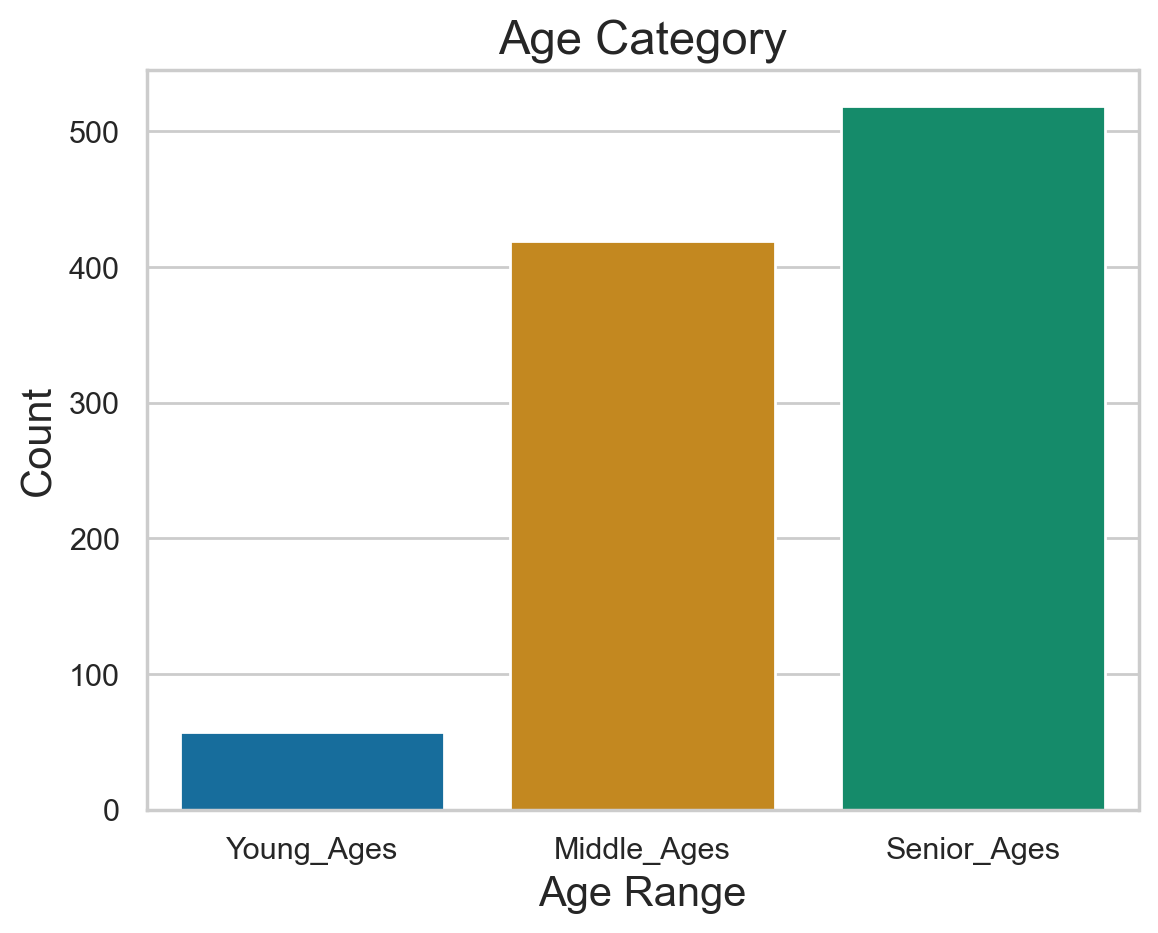

In [37]:
sns.barplot(x=['Young_Ages','Middle_Ages','Senior_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Senior_Ages)], palette= "colorblind")
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [38]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [39]:
Heart['sex1']=Heart['sex'].apply(gender)


In [40]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [41]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Senior Age'

In [42]:
#Applying converted data into our dataset with new column - Age_Range

Heart['Age_Range']=Heart['age'].apply(age_range)
Heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Senior Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Senior Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Senior Age


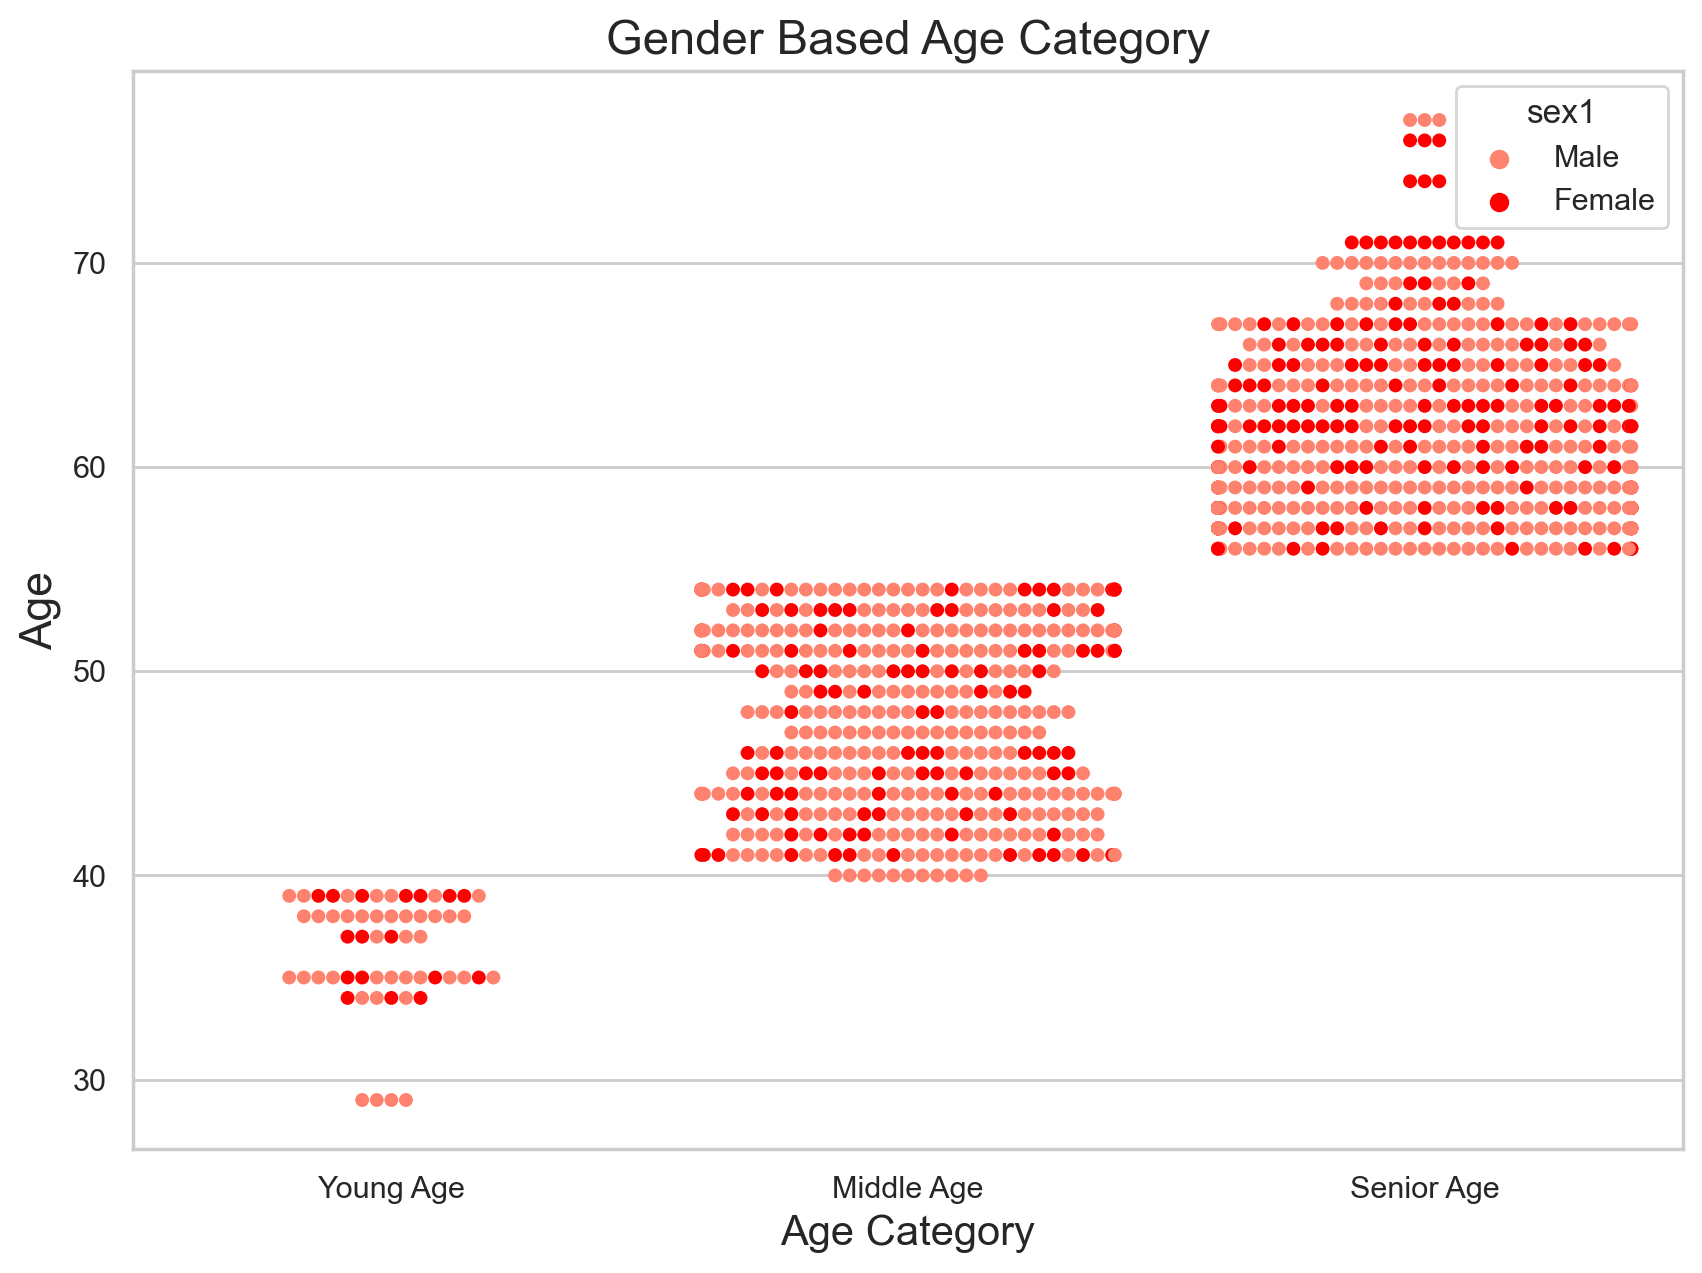

In [43]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=Heart, order= ['Young Age','Middle Age','Senior Age'])
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=16)
plt.show()

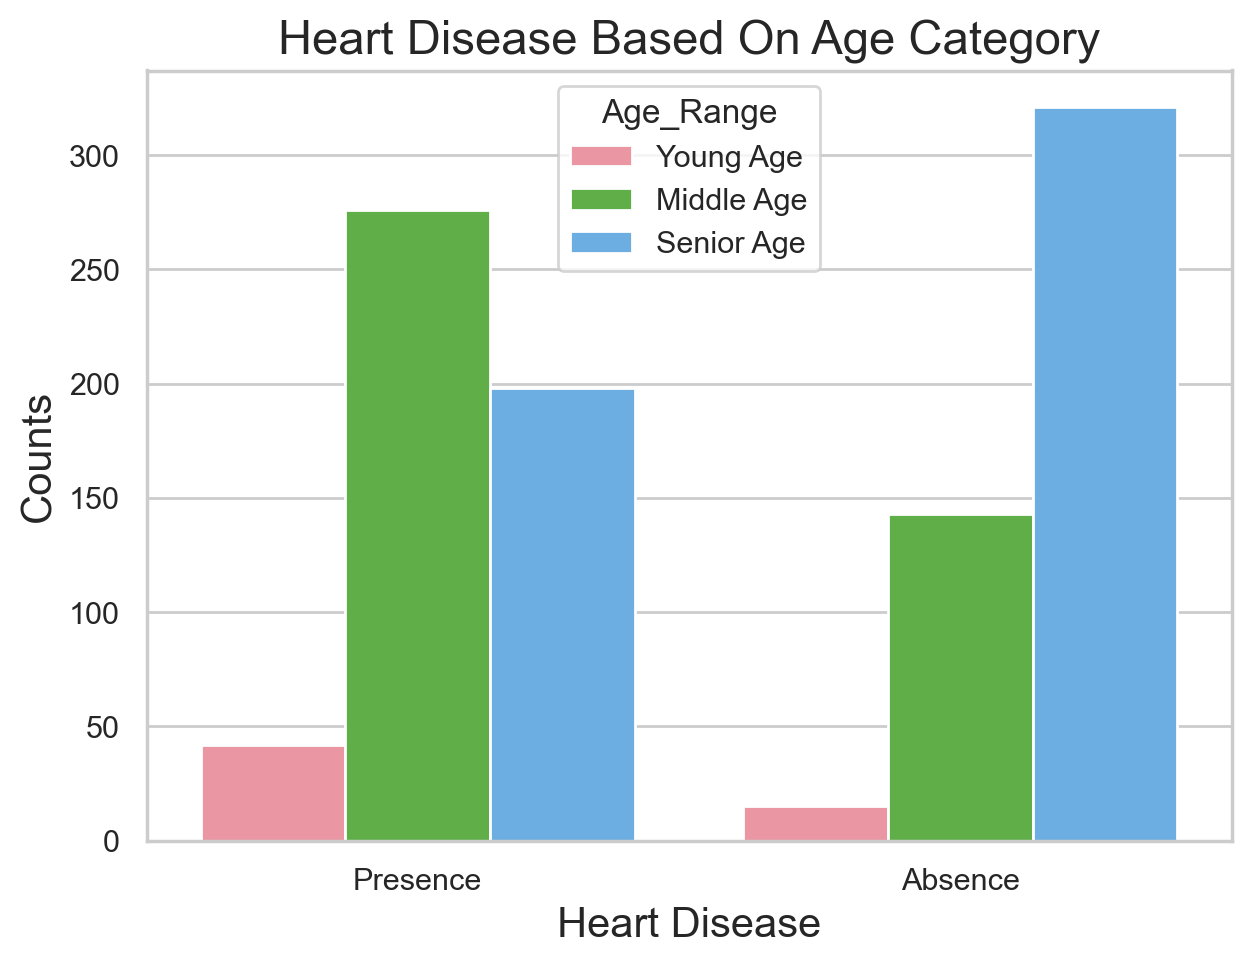

In [44]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Senior Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=Heart, order=['Presence','Absence'], hue_order=hue_order,)
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

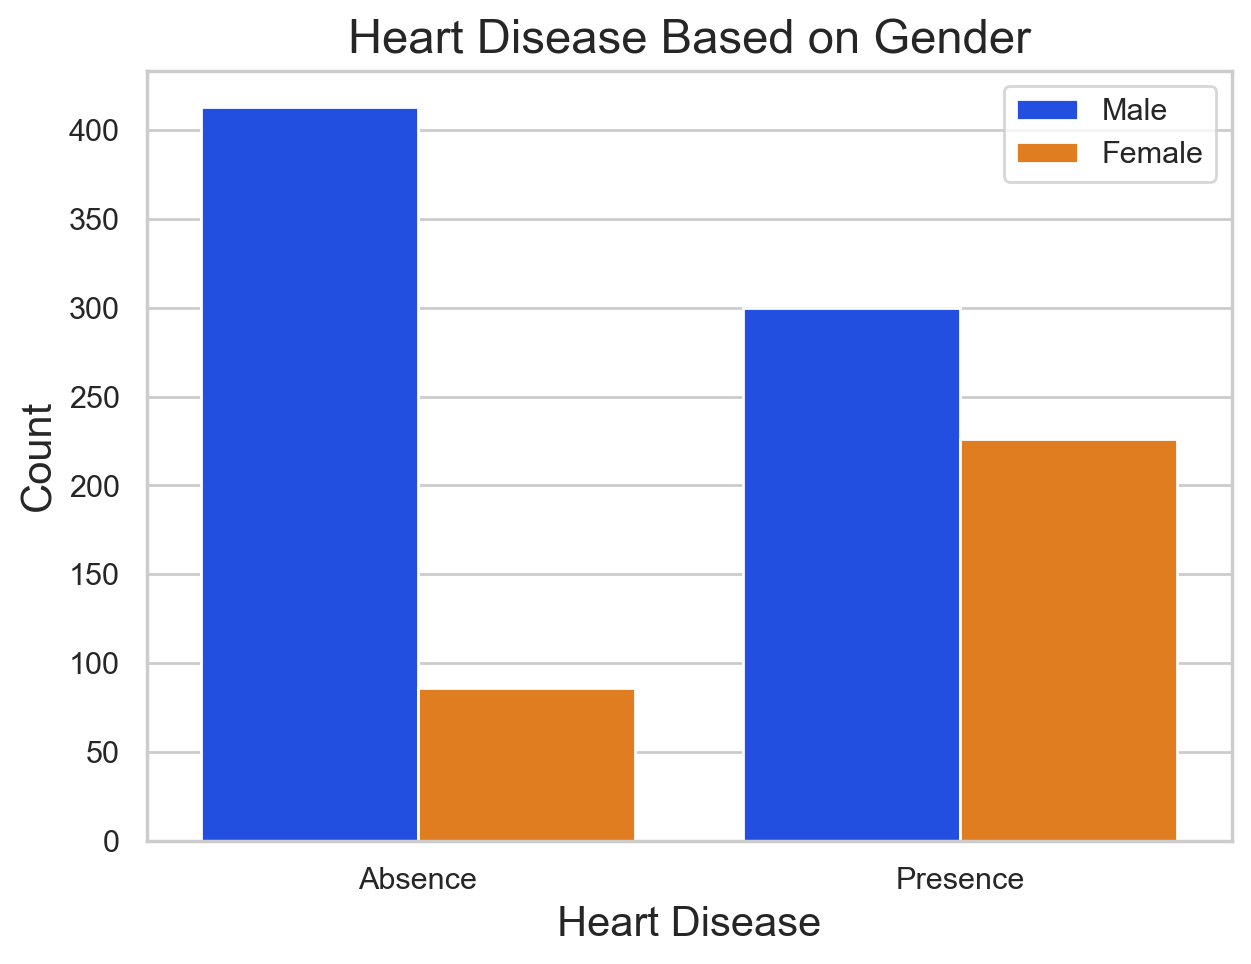

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x=Heart['Heart_Disease'], hue='sex1', data=Heart, palette='bright')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

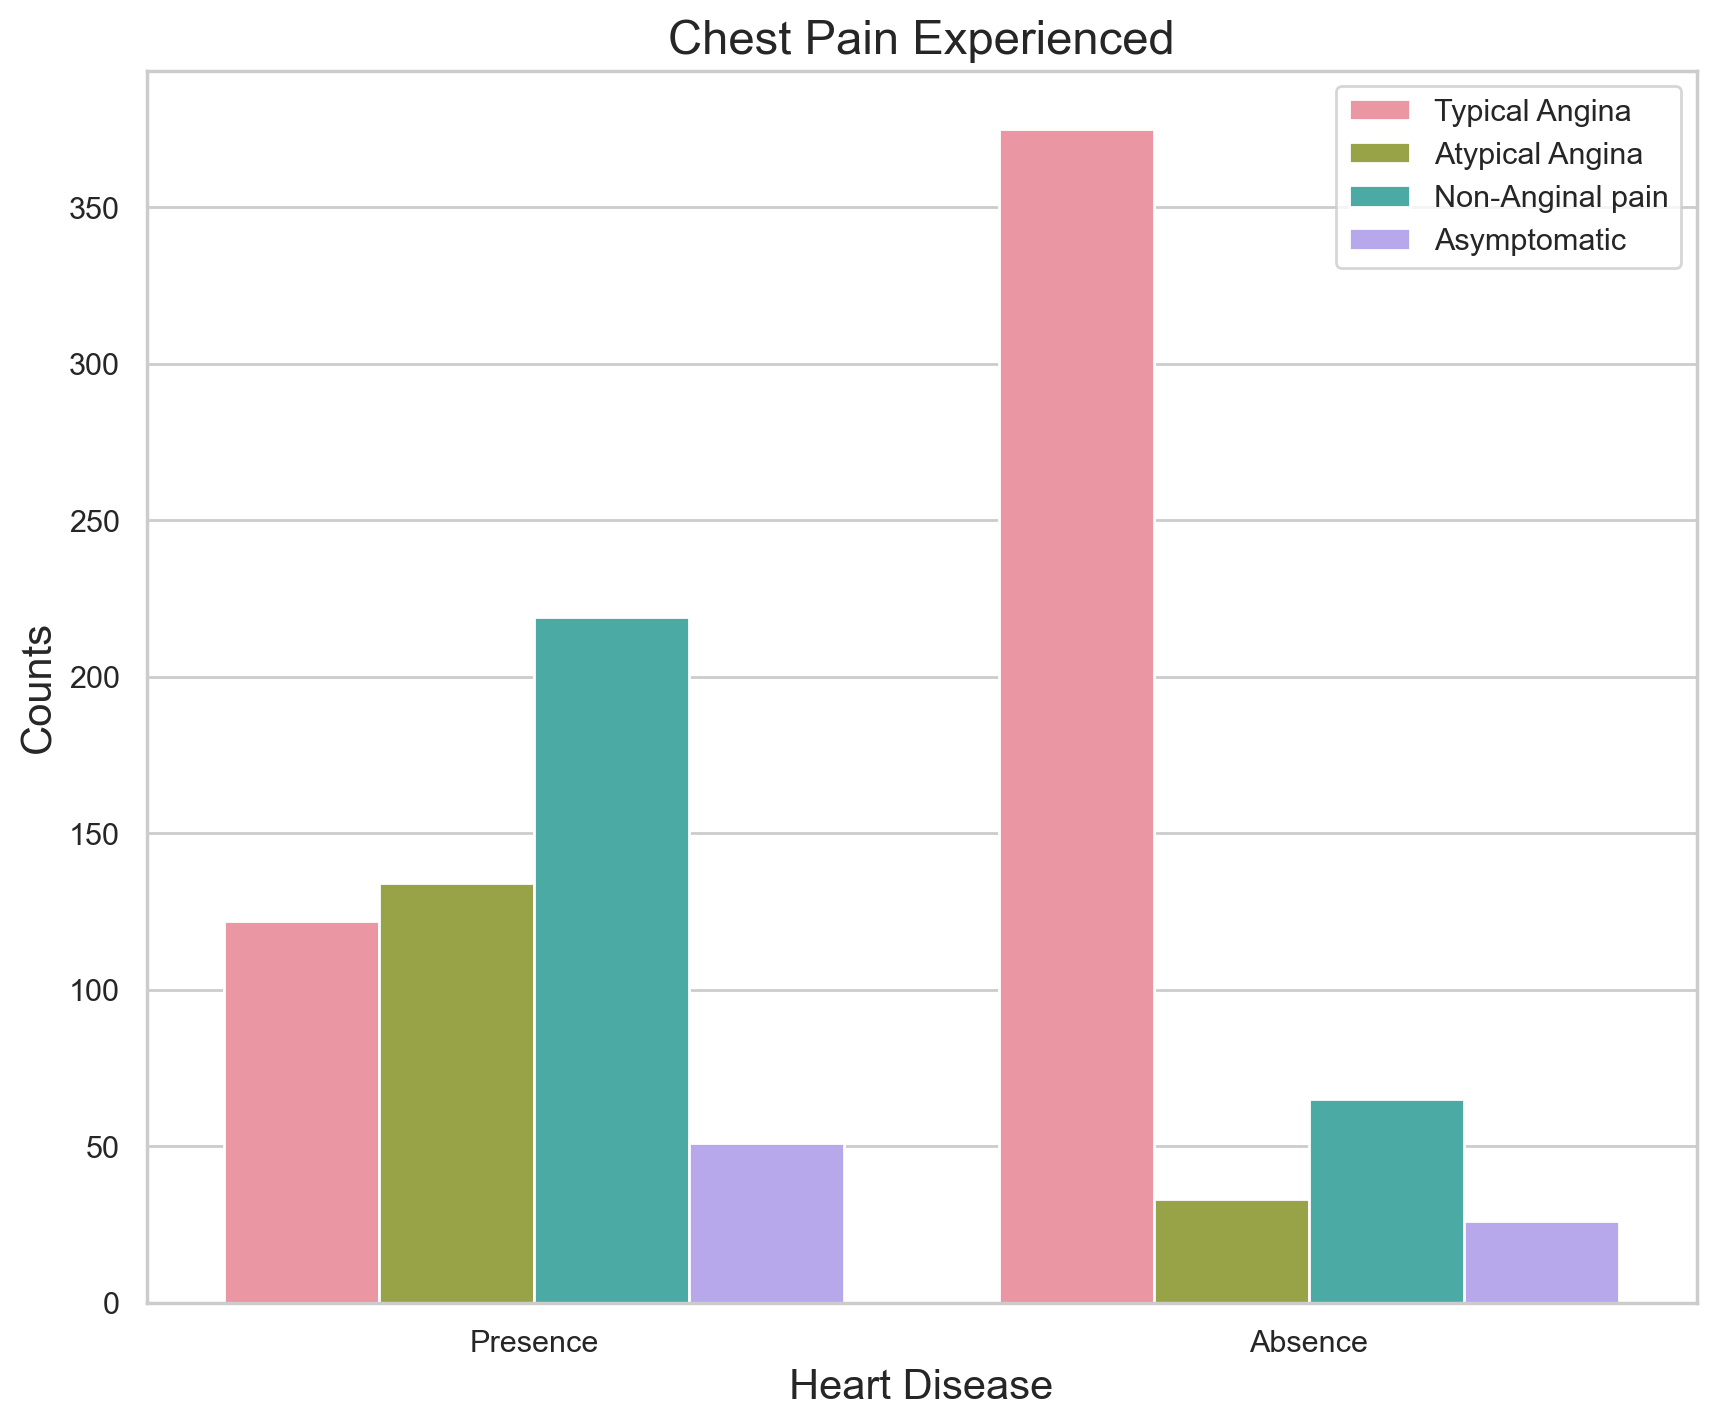

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x=Heart['Heart_Disease'], hue='cp', data=Heart, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

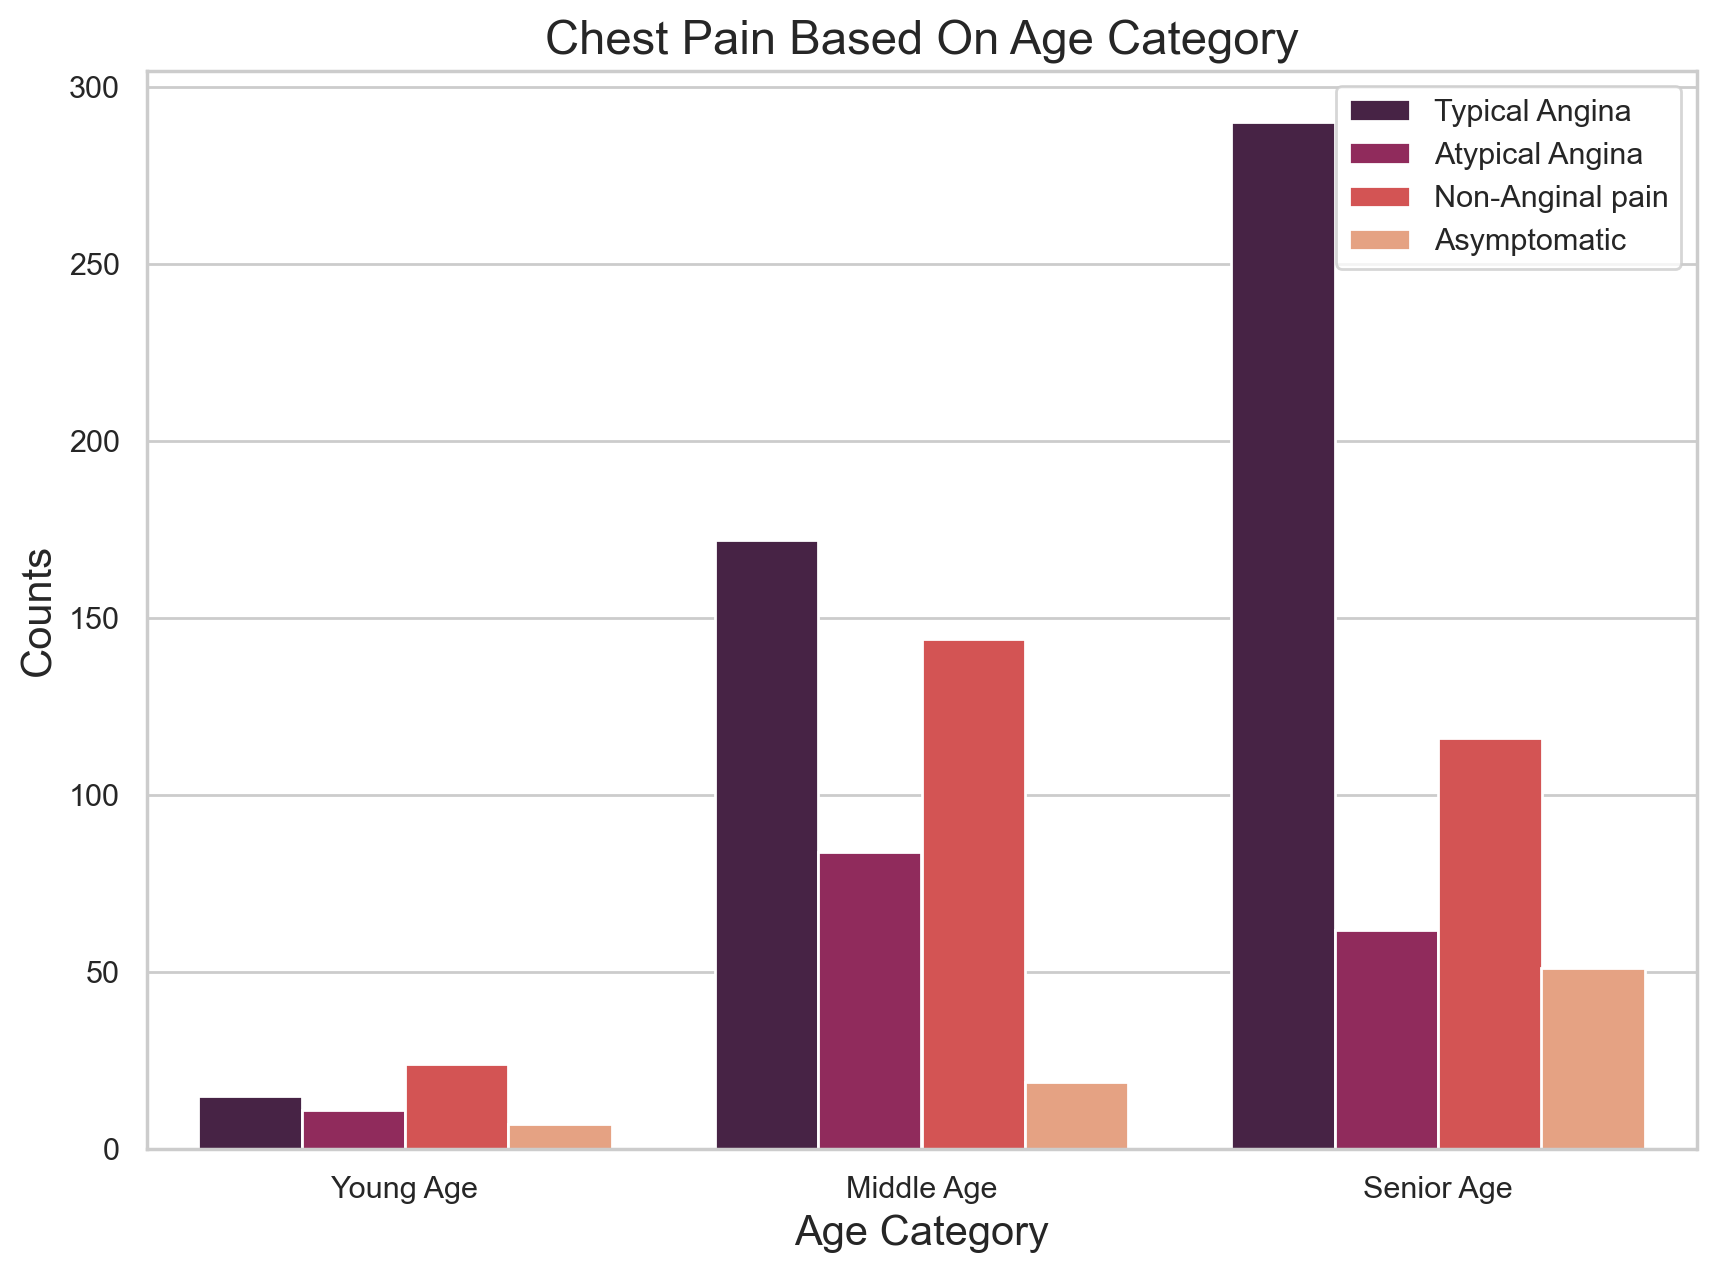

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(x=Heart['Age_Range'], hue='cp', data=Heart, order=['Young Age', 'Middle Age', 'Senior Age'], palette='rocket')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

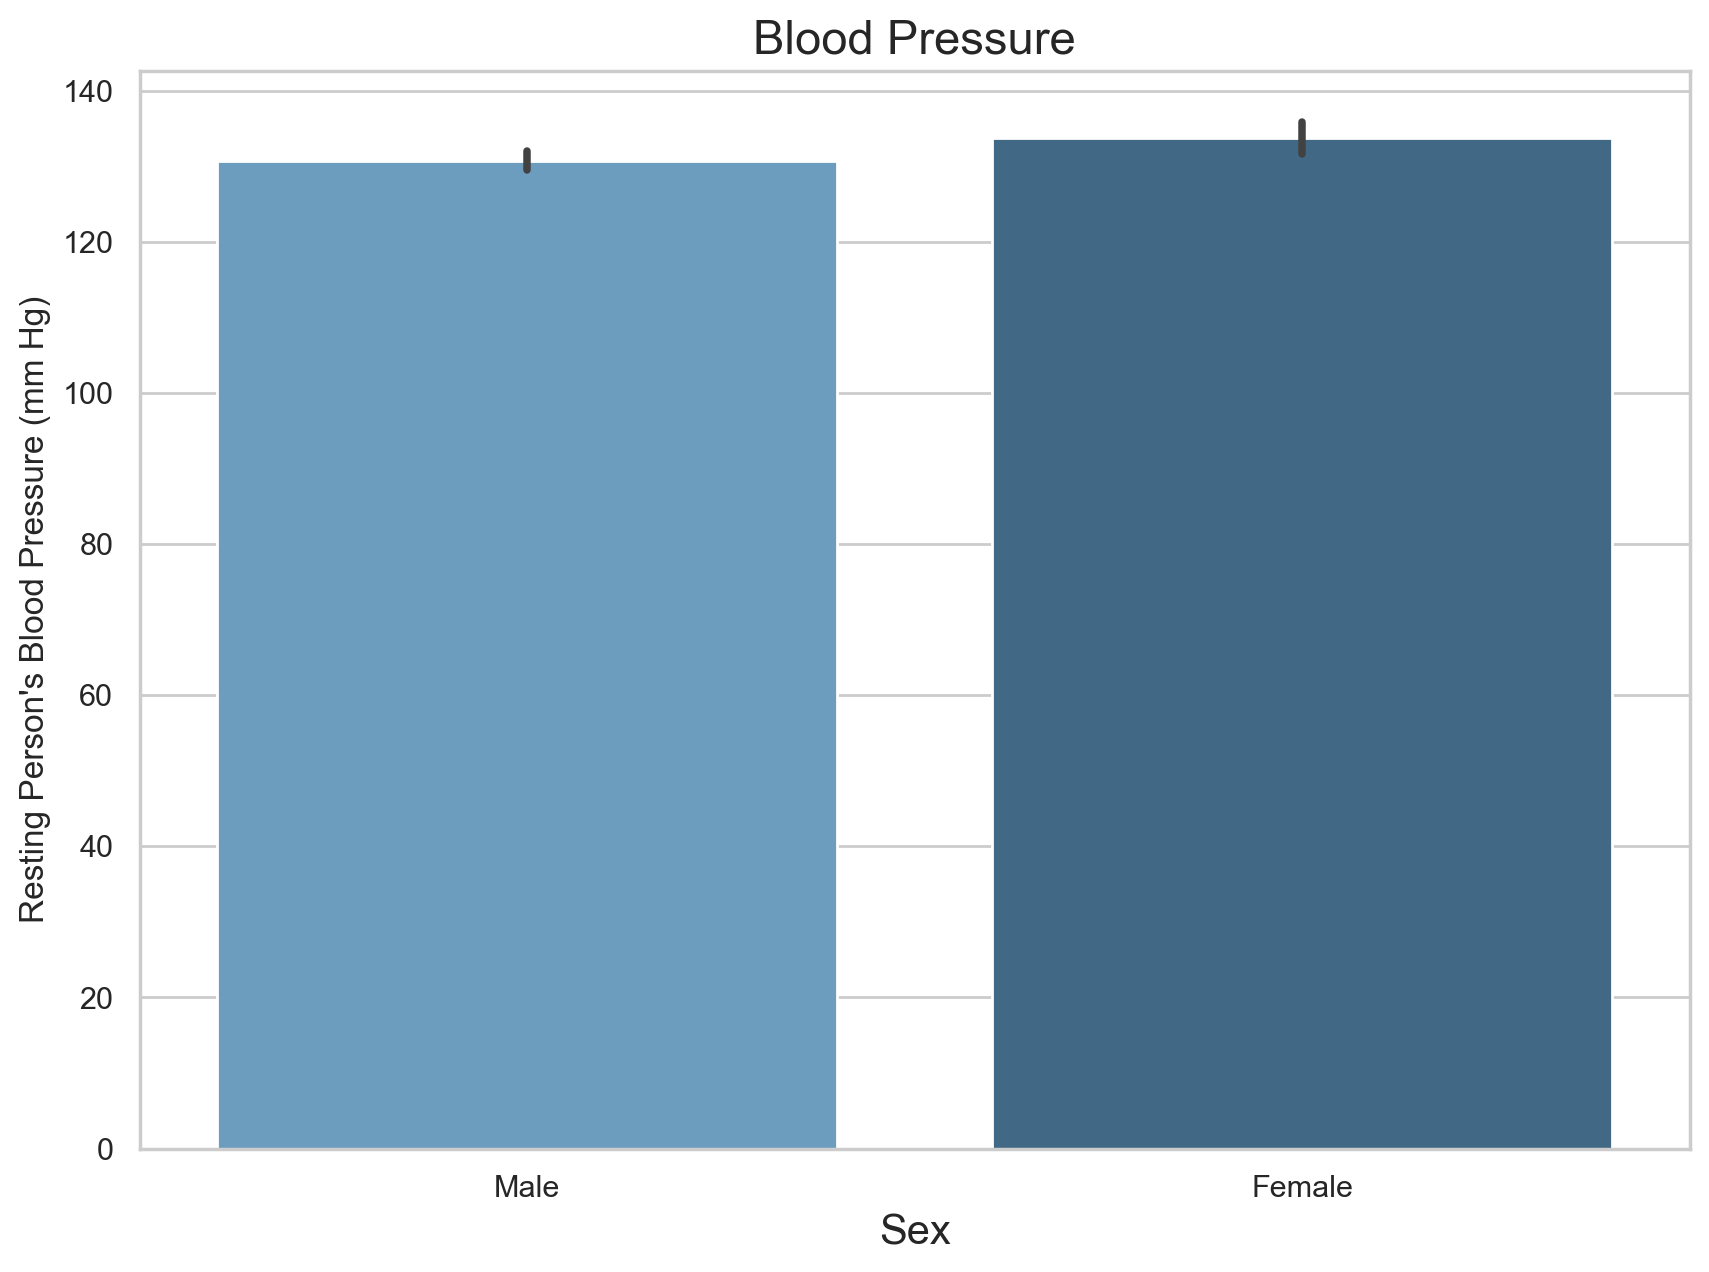

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='trestbps', data=Heart, palette='Blues_d')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Resting Person's Blood Pressure (mm Hg)", fontsize=12)
plt.show()

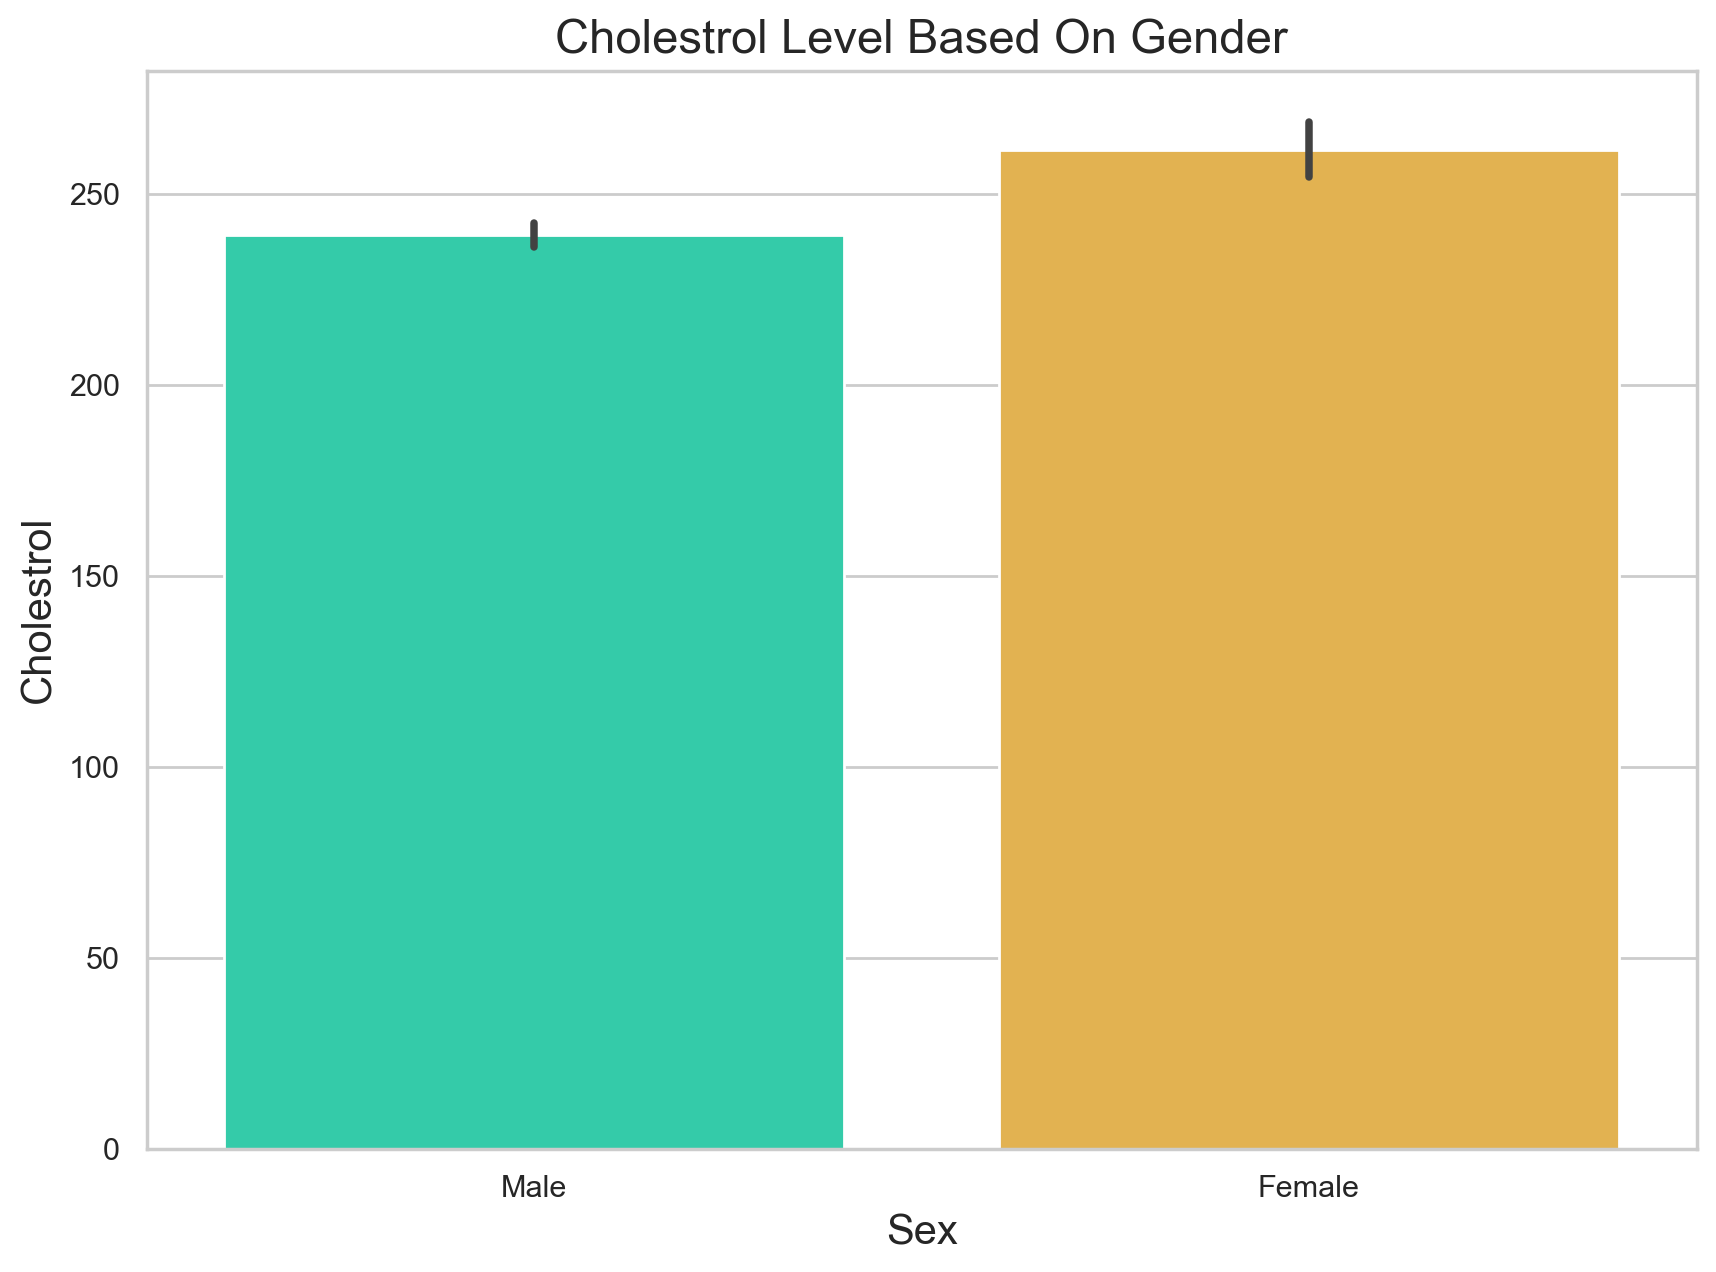

In [50]:

plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='chol', data=Heart, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

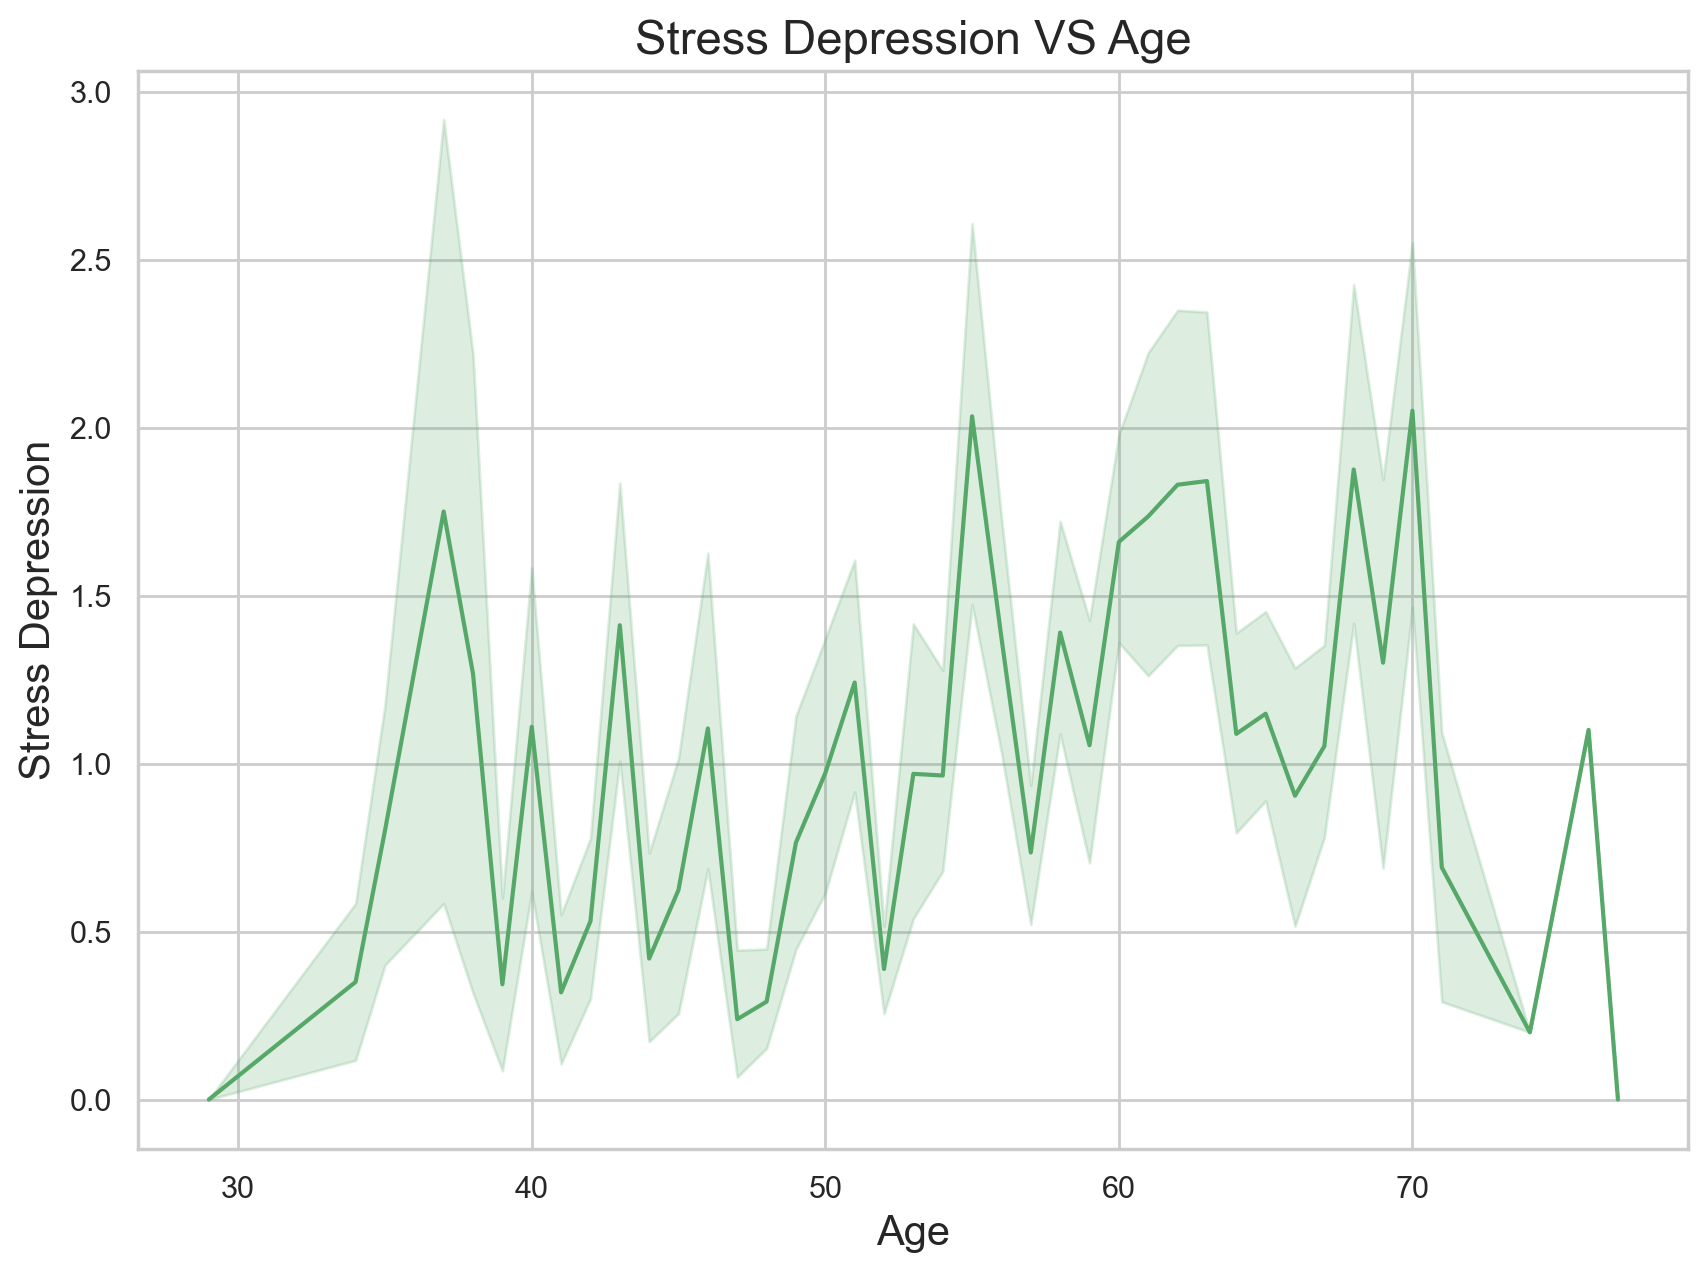

In [53]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age', y='oldpeak', data=Heart, color='g')
plt.title('Stress Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Stress Depression', fontsize=15)
plt.show()

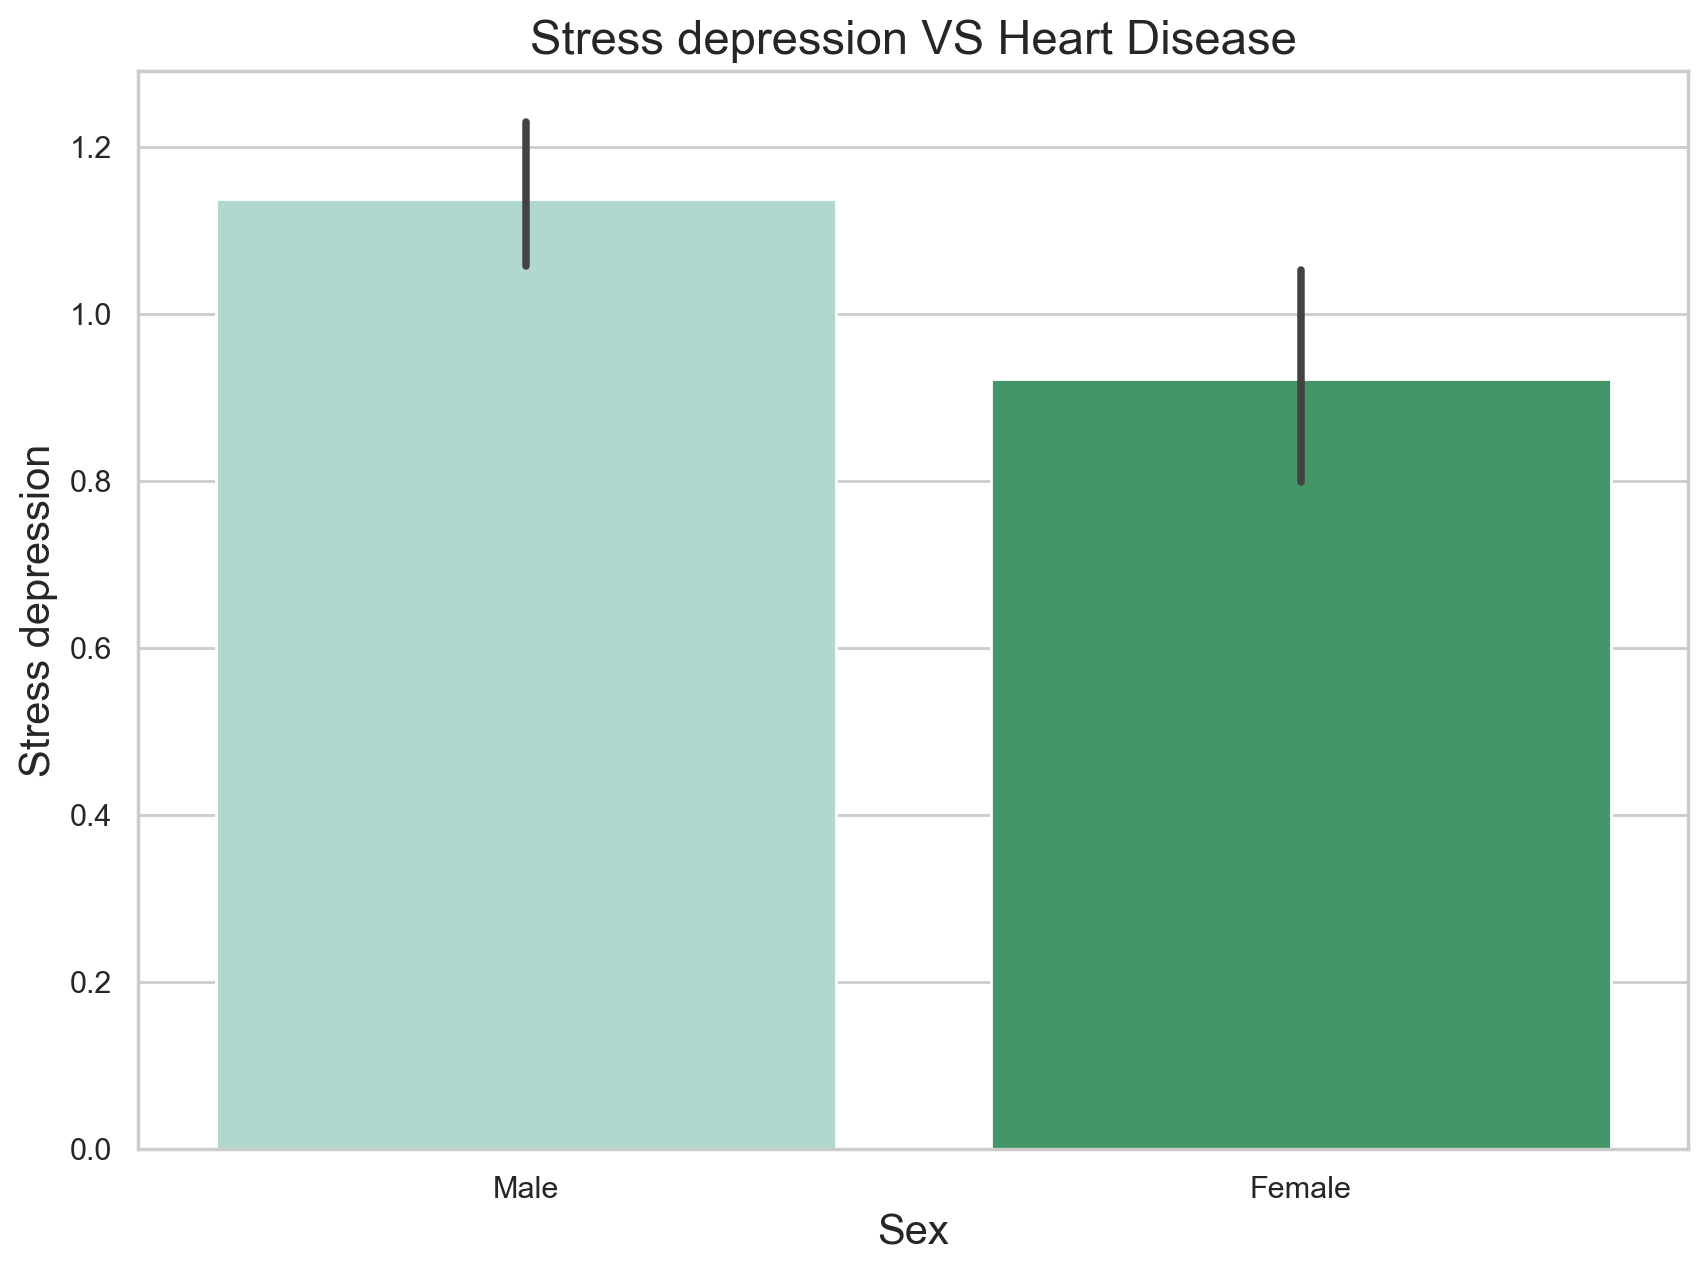

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='oldpeak', data=Heart, palette='BuGn')
plt.title('Stress depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Stress depression', fontsize=15)
plt.show()

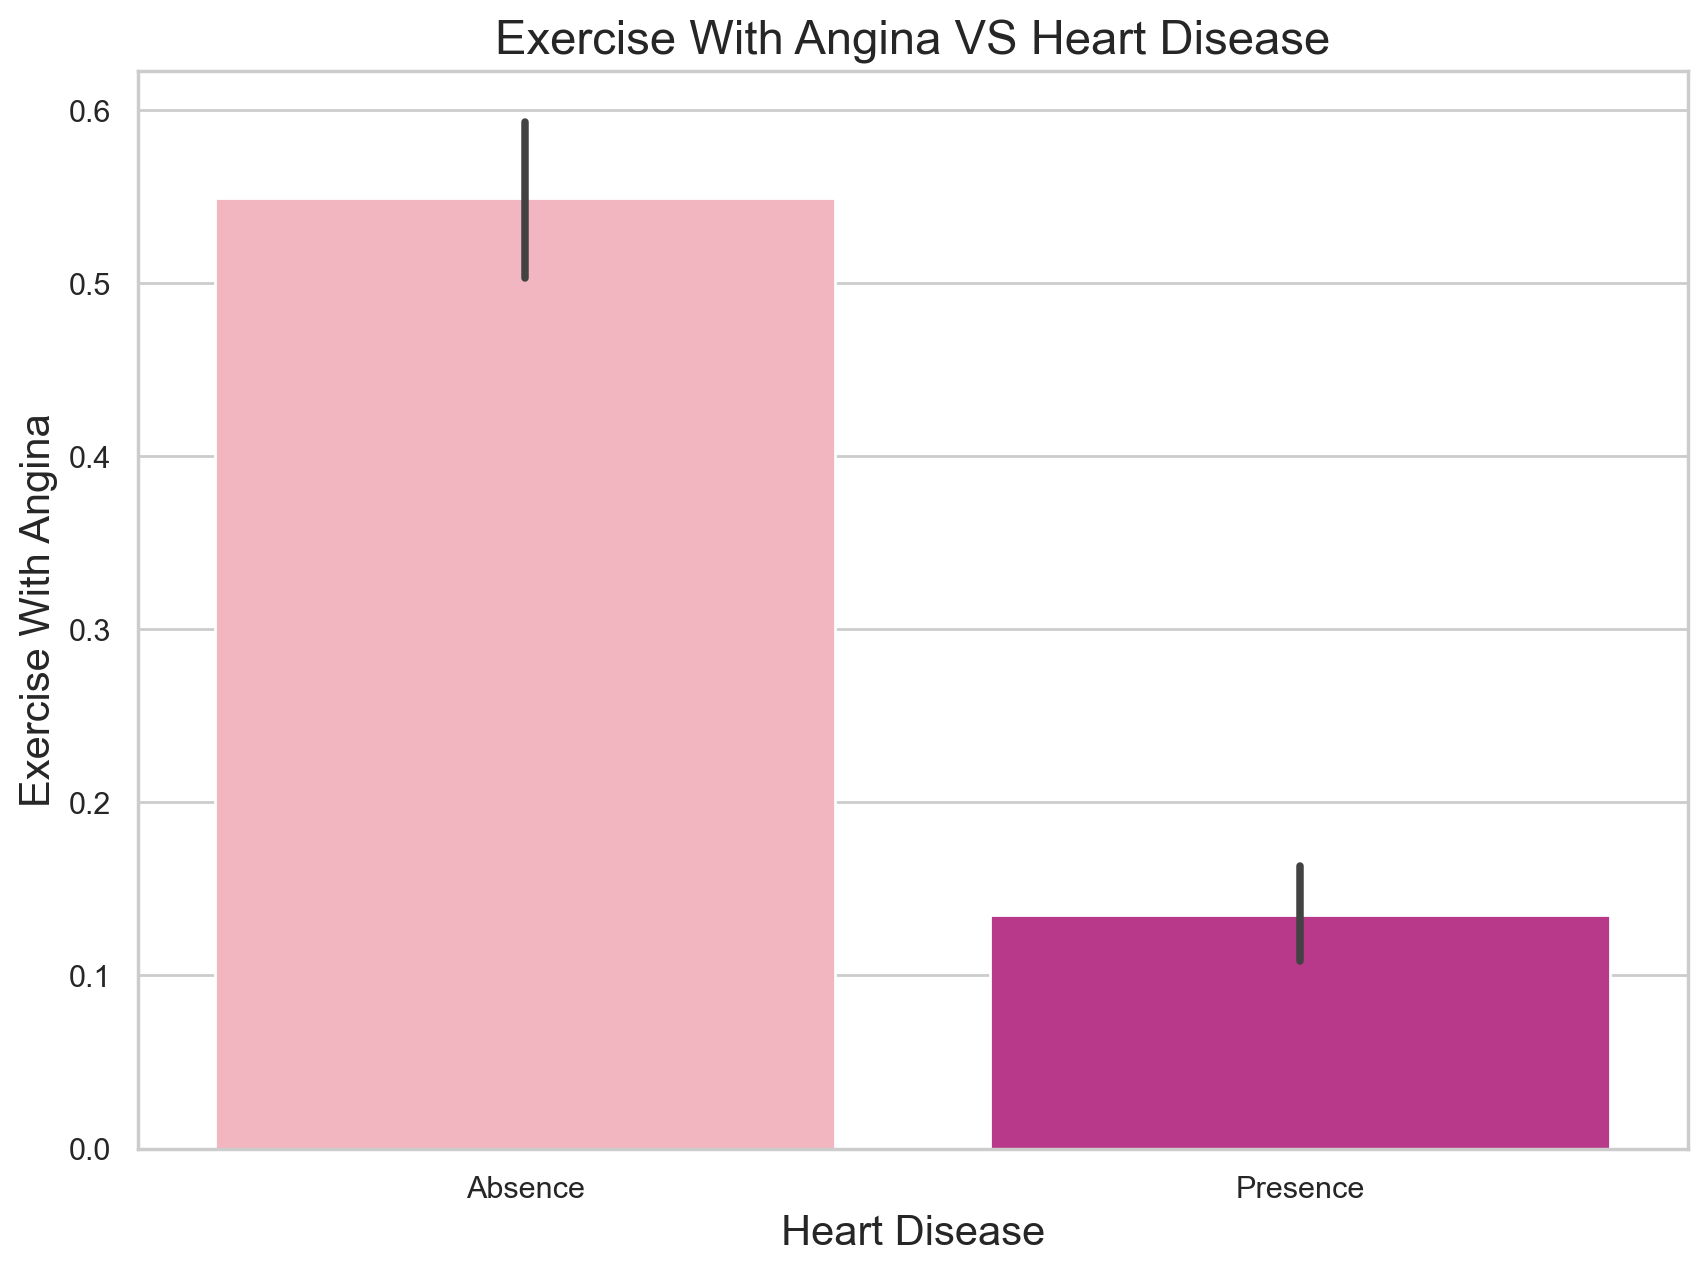

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(x='Heart_Disease', y='exang', data=Heart, palette='RdPu')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()